**Final Project (29cm)** 
# 데이터 전처리 및 탐색

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_column', 1000)
pd.options.display.float_format = '{:.2f}'.format

import random
from tqdm.autonotebook import tqdm
import string
import re
plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

## 파일 불러오기

In [3]:
events = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_events.csv")
products = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_products.csv")
users = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_users.csv")

In [ ]:
ad = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/ad.csv")
advertiser = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/advertiser.csv")
dataset = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/dataset.csv")
impression_log = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/impression_log.csv")
view_log = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/view_log.csv")
viewer = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/viewer.csv")

## 데이터 살펴보기

In [ ]:
events.head()

In [ ]:
events.describe()

In [ ]:
events.info()

In [ ]:
events.isnull().sum()

In [ ]:
products.head()

In [ ]:
products.describe()

In [ ]:
products.info()

In [ ]:
users.head()

In [ ]:
users.describe()

In [ ]:
users.info()

## 데이터 users, products를 events에 병합

In [4]:
df = pd.merge(events, products, how = 'outer', on = 'item_no')

In [5]:
df = pd.merge(df, users, how = 'outer', on = 'user_no')

In [ ]:
df['item_no'].drop_duplicates()

In [ ]:
df['user_no'].drop_duplicates()

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

## 전처리

In [ ]:
import missingno
plt.figure(figsize=(20, 8))
missingno.matrix(df)

In [ ]:
df[df['brand_no'].isnull()]['category3_name']

In [ ]:
df[df['brand_name'].isnull()]

**브랜드 네임 없는 경우 대부분 홑이불**

In [ ]:
#2017년생 구매 데이터

### Users 생년월일 --> 날짜데이터, Null값 처리


In [6]:
df['birth_date'] = pd.to_datetime(df['birth_date'], errors = 'coerce')

In [ ]:
type(df['birth_date'][0])

In [ ]:
df['birth_date'].isnull().sum()

In [7]:
def convert_datetime(row):
    if pd.isnull(row):
        return np.nan
    else:
        return pd.to_datetime(row)

In [8]:
df['birth_date'] = df['birth_date'].apply(convert_datetime)

In [ ]:
df['birth_date'].describe()

In [ ]:
df_year = df['birth_date'].dt.year

In [ ]:
df_year.max()

In [ ]:
x = df_year.unique()
x

In [ ]:
plt.figure(figsize=(20, 7))
a = df_year.plot(kind='hist')
a.get_xaxis().get_major_formatter().set_scientific(False)
plt.grid(color='lightgrey', alpha=0.5)
plt.xticks(np.arange(1923,2017))
plt.show()

### Users 성별

In [ ]:
df['gender'].value_counts()

여성 회원 다수

## 데이터 EDA

### Products 카테고리

In [ ]:
df_category = df.groupby(['category1_name'])['session_id'].count().sort_values(ascending=False).\
reset_index()

#비중
for i in range(len(df_category)):
    df_category['비중'] = df_category['session_id']/df_category['session_id'].sum() * 100

df_category

In [ ]:
colors = sns.color_palette('hls', len(df_category['category1_name'])) 

fig = plt.figure(figsize=(10, 10)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
pie = ax.pie(df_category['비중'], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors
       )
plt.title('카테고리 비중', fontsize=14)
plt.legend(pie[0], df_category['category1_name']) 

In [ ]:
df1 = df.groupby('category1_name')['session_id'].count()
df1

In [ ]:
df3['session_id']

In [ ]:
df3 = df2[df['event_name']=='purchase_success'].set_index('category1_name')
for i in range(len(df3)):
    df3['세션 당 구매율'] = df3['session_id']/df1
df3

In [ ]:
#유저 당 구매율
#유저 한 명이 본 상품 수
#유저 당 구매이벤트 / 총 이벤트 수
df.groupby('user_no')['events_name'].
df.groupby('user_no').sum()

### 코호트 분석

In [ ]:
#https://workingwithpython.com/pythoncohortanalysis/

In [9]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df.head()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845000,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
1,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:47.511013,click_item,+9eODQMZ8YgXQZJJAo56nw==,seELIO8ssL85o/yMQpkKNw==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 이지 쇼츠,13551f740ecacbcce3baf5e232f0fb9b,19900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
2,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:21.636026,click_item,+9eODQMZ8YgXQZJJAo56nw==,AQNsEUBqxMy99Mk6odfWTA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 치노 밴딩 팬츠,569712813f195e07974c740aeb70f7b2,39900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
3,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:58.306042,click_item,+9eODQMZ8YgXQZJJAo56nw==,DfYgpxfLCWwF+gyEmAjGkA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 쿨터치 사이드밴드 슬랙스,54df4e65f4b1dfe66273203fbd3c8d23,49900.00,243100100,의류,243102100,상의,243102103,티셔츠,13901.00,TOPTEN,1969-04-05,F
4,f1b035b71ef5f8e1e7c1d6c0c5032faa,2021-06-10 12:15:42.476001,add_to_cart,+9eODQMZ8YgXQZJJAo56nw==,1/60mbjEzf3sI/52/d9lQA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,[Laslow] SeasonUnit Sigma F (남여공용),3cd917571a5f2a26eb01587d0276227a,65000.00,244100100,잡화,244101100,신발,244101112,슬리퍼,11481.00,LASLOW,1969-04-05,F


In [ ]:
df['event_timestamp'] = df['event_timestamp'].dt.strftime('%y/%m/%d')

In [ ]:
df.head()

In [ ]:
#유저 - 세션 - 타임스탬프 - 이벤트 네임 
CH = df[['user_no', 'session_id', 'event_timestamp', 'event_name']]
CH.head()

In [ ]:
FirstSession = CH.groupby('user_no')['event_timestamp'].min()
FirstSession.head()

In [ ]:
FirstSession

In [ ]:
CH.set_index('user_no', inplace = True)

In [ ]:
CH['FirstSession']=FirstSession

In [ ]:
CH.reset_index(inplace = True)

In [ ]:
grouped = CH.groupby(['FirstSession', 'event_timestamp'])

In [ ]:
CH1 = grouped['user_no'].nunique()
CH1.head(10)

In [ ]:
CH1.reset_index()

In [ ]:
CH1.rename({'user_no':'TotalUsers'},axis=1,inplace=True)
CH1 = CH1.reset_index()

In [ ]:
CH1

In [ ]:
each_period=CH1['FirstSession'].value_counts().sort_index()
each_period

In [ ]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [ ]:
CH1['CohortPeriod']=cohortperiod
CH1.head(20)

In [ ]:
CH1.set_index(['FirstSession','CohortPeriod'],inplace=True)
CH1.head()

In [ ]:
CH1=CH1['user_no'].unstack(1)
CH1

In [ ]:
CH1[0]

In [ ]:
user_retention=CH1.divide(CH1[0],axis=0)
user_retention

In [ ]:
plt.figure(figsize=(200, 100))
plt.title('Cohort Analysis', fontsize=20)
sns.heatmap(user_retention, annot=True, annot_kws ={'size' : 20}, fmt='.0%', vmin=0, vmax=0.3)
plt.savefig('Cohort pic')
plt.show()


### 세션 분석

In [ ]:
df['event_timestamp']

In [ ]:
session = df['event_timestamp'].dt.strftime('%H:%M:%S')

In [ ]:
session = session.sort_values()
session

In [ ]:
session_0 = session[session=='00:00:00']

In [ ]:
session_0.value_counts()

### 세션 대비 구매율

In [ ]:
#session 중복 제거 - 

In [ ]:
df.groupby(['user_no','session_id'])['event_name'].count()

In [ ]:
#일단 세션 중복 날려서 유저 당 세션 수 구하기
df_drop_duplicate = df['session_id'].drop_duplicates()
df_drop_duplicate

In [ ]:
#session 중복 제거된 값
df_drop_duplicate = df[['user_no','session_id']]
df_drop_duplicate = df_drop_duplicate.drop_duplicates()

In [ ]:
#사용자별 세션 수
drop_session = df_drop_duplicate.groupby('user_no')['session_id'].count()

In [ ]:
#purchase 수
purchase = df[df['event_name']=='purchase_success']
#df 5880407 / purchase = 465253

In [ ]:
purchase_session = purchase.groupby('user_no')['session_id'].count()

In [ ]:
purchase_session = purchase_session.reset_index()

In [ ]:
purchase_session.columns = ['user_no', 'purchase_success']

In [ ]:
User_drop_duplicate = pd.merge(purchase_session, drop_session, how='outer', on = 'user_no')

In [ ]:
User_drop_duplicate['세션 당 구매'] = User_drop_duplicate['purchase_success']/User_drop_duplicate['session_id']*100

In [ ]:
#유저 당 구매 횟수, 세션 수, 세션 당 구매(%)
User_drop_duplicate.head()

In [ ]:
User_drop_duplicate.sort_values(by = '세션 당 구매', ascending=False).head()

In [ ]:
User_drop_duplicate.sort_values(by = 'session_id', ascending=False).head()

In [ ]:
User_drop_duplicate.sort_values(by = 'purchase_success', ascending=False).head()

In [ ]:
User_drop_duplicate.describe()

### 세션 당 구매 금액, 유저 당 구매 금액

In [10]:
#유저 별 셋션 당 아이템
df.groupby(['user_no','session_id','event_name'])['item_name'].count()

user_no                   session_id                        event_name      
+++T9c17sr6wEYOy9UFv3w==  1679091c5a880faf6fb5e6087eb1b2dc  like_item           1
                          8f14e45fceea167a5a36dedd4bea2543  like_item           1
                          a87ff679a2f3e71d9181a67b7542122c  add_to_cart         1
                                                            click_item          1
                          c4ca4238a0b923820dcc509a6f75849b  purchase_success    1
                                                                               ..
zzxlG1wzPCGvsW0SlOleDg==  2afffa6a9f1e44c3fa8d7a6f320cd59c  click_item          1
zzzTNW8escss3zrnpuGMhQ==  1a5794d7d2b6ab6321ee060c679a6ab6  add_to_cart         1
zzzWx+6Z3L2IRJBTgvBs5g==  23b97dc3b2fc80c1924d28c53164351a  purchase_success    1
                          384b39b543032d5211fc47821c26a837  click_item          1
                          ba26b3c58cb9a591d68ad8fb78b468f7  purchase_success    2
Name: item_name, Leng

In [11]:
user_price = df.groupby(['user_no','session_id','event_name'])['price'].sum()

In [12]:
user_price = user_price.reset_index()

In [13]:
user_price_purchase = user_price[user_price['event_name']=='purchase_success']

In [14]:
user_sales = user_price_purchase.groupby('user_no')['price'].sum()

In [15]:
#고객당 구매 금액
user_sales.sort_values(ascending = False)

user_no
b2xZVfUtjyGsZckO7j6zkg==   29726100.00
anAN3a+fvEnnvFdQ61+Egw==   22966700.00
pywOPeCTmJKudBVHC1/5iw==   11035900.00
b/lqkmii6O9hL/CH0kWgLA==   10094000.00
8j/l4DjsSqXcIR9r5GAmLQ==   10068900.00
                               ...    
zsIsMbNoIc4xEmZenh3B3w==        600.00
N1KCZiTobZBss1eWO2iSaA==        500.00
b92MPzK5El3jMdyexHEcwA==        500.00
yHqaSnz/MQRtTX8TRSQ/yA==          0.00
6ir2ttlfekzXxidzH6Gu3A==          0.00
Name: price, Length: 146904, dtype: float64

In [16]:
user_sales = user_sales.reset_index()

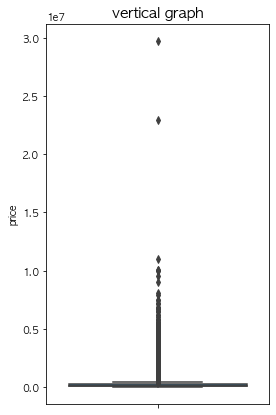

In [17]:
# boxplot 세로 그래프
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'price', data = user_sales)
plt.title('vertical graph', size = 15)
plt.show()

**소수 유저의 구매 금액이 이상치 급으로 큰 것을 확인**

## RFM 분석 - Monetary

In [65]:
#4 Quantile
num = user_sales['price']
Q1 = num.quantile(.25)
Q3 = num.quantile(.75)
IQR = Q3 - Q1
Q2 = num.quantile(.5)
Q4 = num.quantile(1)

print('Q1: ', Q1)
print('Q2: ', Q2)
print('Q3: ', Q3)
print('Q4: ', Q4)

Q1:  49000.0
Q2:  100499.5
Q3:  216500.0
Q4:  29726100.0


In [73]:
user_sales['monetary'] = ""

In [74]:
#monetary 를 4분위로 점수 부여
for i in range(1, len(user_sales['monetary'])):
    if user_sales['price'][i] > Q3 :
        user_sales['monetary'][i] = 4
    elif user_sales['price'][i] > Q2:
        user_sales['monetary'][i] = 3
    elif user_sales['price'][i] > Q1:
        user_sales['monetary'][i] = 2
    else:
        user_sales['monetary'][i] = 1

In [75]:
user_sales.head()

,user_no,price,monetary
0,+++T9c17sr6wEYOy9UFv3w==,274500.00,
1,+++aQH5NnhiU/9qECKk3uQ==,163000.00,3
2,++0bwiYVJ/TAsCpxI4UCuw==,88000.00,2
3,++1HN9s1imztN8ftPCt3LA==,16800.00,1
4,++2StXdzG0Bj/Kkb5EFcog==,25900.00,1


In [46]:
# for index, row in user_sales.iterrows():
#     if row.price > Q3:
#         df.loc[index, 'monetary'] = 4
#     elif row.price > Q2:
#         df.loc[index, 'monetary'] = 3
#     elif row.price > Q1:
#         df.loc[index, 'monetary'] = 2
#     else:
#         df.loc[index, 'monetary'] = 1

KeyboardInterrupt: 

In [63]:
#점수 별 수
user_sales['monetary'].value_counts()

1    37794
3    36731
4    36721
2    35658
Name: 등급, dtype: int64

## RFM 분석 - Frequency

In [79]:
#구매 빈도 구하기
user_purchase = df[df['event_name']=='purchase_success'][['user_no', 'event_timestamp']]

In [81]:
user_purchase.head()

,user_no,event_timestamp
40,l1wFRhb3av5rTWyYEofrIA==,2021-07-22 09:06:32.310004
49,l1wFRhb3av5rTWyYEofrIA==,2021-07-22 09:06:32.312005
52,Y5GM63HPuFwrRnvYhDu7sQ==,2021-06-05 16:34:41.511016
53,Y5GM63HPuFwrRnvYhDu7sQ==,2021-06-05 16:34:41.511017
55,Y5GM63HPuFwrRnvYhDu7sQ==,2021-06-10 20:26:17.230003


In [84]:
user_purchase = user_purchase.groupby('user_no')['event_timestamp'].count().reset_index()

In [87]:
#구매 빈도
user_purchase['event_timestamp'].value_counts().sort_index()

1      60644
2      32572
3      15983
4      10955
5       6391
6       4858
7       3186
8       2555
9       1867
10      1529
11      1083
12       925
13       683
14       580
15       458
16       391
17       292
18       261
19       192
20       184
21       132
22       128
23       117
24       106
25        95
26        63
27        74
28        49
29        48
30        48
31        43
32        29
33        42
34        26
35        31
36        24
37        18
38        15
39        21
40        10
41        12
42        11
43        16
44        11
45        11
46         5
47         7
48         7
49         5
50         9
51         9
52         4
53         5
54         7
55         4
56         2
57         5
58         1
59         4
60         2
61         5
62         3
63         2
64         2
65         2
67         2
68         4
70         3
71         4
72         1
73         1
74         1
75         3
77         1
78         2
79         1
82         1

In [90]:
user_purchase['frequency'] = ""

In [98]:
user_purchase.head()

,user_no,event_timestamp,frequency
0,+++T9c17sr6wEYOy9UFv3w==,4,
1,+++aQH5NnhiU/9qECKk3uQ==,2,
2,++0bwiYVJ/TAsCpxI4UCuw==,1,
3,++1HN9s1imztN8ftPCt3LA==,1,
4,++2StXdzG0Bj/Kkb5EFcog==,1,


In [105]:
# frequency 점수 부여
for i in range(1, len(user_purchase['frequency'])):
    if user_purchase['event_timestamp'][i] == 1:
        user_purchase['frequency'][i] = 1
    elif user_purchase['event_timestamp'][i] <= 3:
        user_purchase['frequency'][i] = 2
    elif user_purchase['event_timestamp'][i] <= 10:
        user_purchase['frequency'][i] = 3
    else:
        user_purchase['frequency'][i] = 4

In [ ]:
# for i in range(1, 146905):
#     if df_Frequency['Frequency_purchase'][i] == 1:
#         df_Frequency['F_Score'][i] = 1
#     elif df_Frequency['Frequency_purchase'][i] <= 3:
#         df_Frequency['F_Score'][i] = 2
#     elif df_Frequency['Frequency_purchase'][i] <= 10:
#         df_Frequency['F_Score'][i] = 3
#     else:
#         df_Frequency['F_Score'][i] = 4

In [106]:
user_purchase['frequency'].value_counts()

1    60644
2    48555
3    31340
4     6364
         1
Name: frequency, dtype: int64

## RFM 분석 - Frequency 세션 기준

In [280]:
user_recency = df[df['event_name']=='purchase_success'][['session_id', 'user_no', 'event_timestamp', 'event_name']]

In [281]:
user_recency

,session_id,user_no,event_timestamp,event_name
40,cddf65caad5fe0da36ceaeaf6ecc7d45,l1wFRhb3av5rTWyYEofrIA==,2021-07-22 09:06:32.310004,purchase_success
49,cddf65caad5fe0da36ceaeaf6ecc7d45,l1wFRhb3av5rTWyYEofrIA==,2021-07-22 09:06:32.312005,purchase_success
52,16e708ee91a1bd7beb297bf6bad1ddaa,Y5GM63HPuFwrRnvYhDu7sQ==,2021-06-05 16:34:41.511016,purchase_success
53,16e708ee91a1bd7beb297bf6bad1ddaa,Y5GM63HPuFwrRnvYhDu7sQ==,2021-06-05 16:34:41.511017,purchase_success
55,62f88dca0928240cc90b285198b43f73,Y5GM63HPuFwrRnvYhDu7sQ==,2021-06-10 20:26:17.230003,purchase_success
...,...,...,...,...
5880386,27f0fb7b0a61f8f92fdfd2c73f6b4c72,oh75lIfzKEJ2rFR/iJ/qdA==,2021-08-04 10:23:49.345004,purchase_success
5880391,27f0fb7b0a61f8f92fdfd2c73f6b4c72,oh75lIfzKEJ2rFR/iJ/qdA==,2021-08-04 10:23:49.346005,purchase_success
5880394,d5b03d3acb580879f82271ab4885ee5e,+LFNEeZb/856pFisEieEiQ==,2021-08-04 09:07:15.743004,purchase_success
5880402,9034aefc59c787ca83bd15648e93ad3a,8okJXtYVKYoBoBAG823v2Q==,2021-08-04 11:05:01.281062,purchase_success


In [282]:
user_recency1 = user_recency.groupby('user_no')['session_id'].count().reset_index()

In [283]:
user_recency = pd.merge(user_recency, user_recency1, how = 'outer', on = 'user_no')

In [284]:
user_recency.columns=['session_id', 'user_no', 'event_timestamp', 'event_name', 'session_count']

In [285]:
user_recency.set_index('user_no', inplace = True)

### Recency 위한 시간데이터화

In [286]:
user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'])

In [287]:
user_recency['event_timestamp'] = user_recency['event_timestamp'].dt.strftime('%y/%m/%d')

In [288]:
user_recency.head()

,session_id,event_timestamp,event_name,session_count
user_no,,,,
l1wFRhb3av5rTWyYEofrIA==,cddf65caad5fe0da36ceaeaf6ecc7d45,21/07/22,purchase_success,2
l1wFRhb3av5rTWyYEofrIA==,cddf65caad5fe0da36ceaeaf6ecc7d45,21/07/22,purchase_success,2
Y5GM63HPuFwrRnvYhDu7sQ==,16e708ee91a1bd7beb297bf6bad1ddaa,21/06/05,purchase_success,8
Y5GM63HPuFwrRnvYhDu7sQ==,16e708ee91a1bd7beb297bf6bad1ddaa,21/06/05,purchase_success,8
Y5GM63HPuFwrRnvYhDu7sQ==,62f88dca0928240cc90b285198b43f73,21/06/10,purchase_success,8


In [289]:
user1 = user_recency.groupby('user_no')['event_timestamp'].max().reset_index()

In [290]:
user1.head()

,user_no,event_timestamp
0,+++T9c17sr6wEYOy9UFv3w==,21/07/03
1,+++aQH5NnhiU/9qECKk3uQ==,21/06/21
2,++0bwiYVJ/TAsCpxI4UCuw==,21/07/27
3,++1HN9s1imztN8ftPCt3LA==,21/06/10
4,++2StXdzG0Bj/Kkb5EFcog==,21/06/29


In [291]:
user_recency = pd.merge(user_recency, user1, how = 'outer', on = 'user_no')

In [292]:
user_recency

,user_no,session_id,event_timestamp_x,event_name,session_count,event_timestamp_y
0,l1wFRhb3av5rTWyYEofrIA==,cddf65caad5fe0da36ceaeaf6ecc7d45,21/07/22,purchase_success,2,21/07/22
1,l1wFRhb3av5rTWyYEofrIA==,cddf65caad5fe0da36ceaeaf6ecc7d45,21/07/22,purchase_success,2,21/07/22
2,Y5GM63HPuFwrRnvYhDu7sQ==,16e708ee91a1bd7beb297bf6bad1ddaa,21/06/05,purchase_success,8,21/07/07
3,Y5GM63HPuFwrRnvYhDu7sQ==,16e708ee91a1bd7beb297bf6bad1ddaa,21/06/05,purchase_success,8,21/07/07
4,Y5GM63HPuFwrRnvYhDu7sQ==,62f88dca0928240cc90b285198b43f73,21/06/10,purchase_success,8,21/07/07
...,...,...,...,...,...,...
465248,oh75lIfzKEJ2rFR/iJ/qdA==,27f0fb7b0a61f8f92fdfd2c73f6b4c72,21/08/04,purchase_success,2,21/08/04
465249,oh75lIfzKEJ2rFR/iJ/qdA==,27f0fb7b0a61f8f92fdfd2c73f6b4c72,21/08/04,purchase_success,2,21/08/04
465250,+LFNEeZb/856pFisEieEiQ==,d5b03d3acb580879f82271ab4885ee5e,21/08/04,purchase_success,1,21/08/04
465251,8okJXtYVKYoBoBAG823v2Q==,9034aefc59c787ca83bd15648e93ad3a,21/08/04,purchase_success,1,21/08/04


In [293]:
user_recency.columns = ['user_no', 'session_id', 'event_timestamp', 'event_name', 'session_count', 'event_max']

In [294]:
user_recency['recency'] = ""

In [295]:
user_recency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465253 entries, 0 to 465252
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_no          465253 non-null  object
 1   session_id       465253 non-null  object
 2   event_timestamp  465253 non-null  object
 3   event_name       465253 non-null  object
 4   session_count    465253 non-null  int64 
 5   event_max        465253 non-null  object
 6   recency          465253 non-null  object
dtypes: int64(1), object(6)
memory usage: 28.4+ MB


In [296]:
user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'], yearfirst = True).dt.strftime('%y/%m/%d')
user_recency['event_max'] = pd.to_datetime(user_recency['event_max'], yearfirst = True).dt.strftime('%y/%m/%d')

In [297]:
# user_recency['event_timestamp'] = pd.to_datetime(user_recency['event_timestamp'])
# user_recency['event_max'] = pd.to_datetime(user_recency['event_max'])

In [298]:
user_recency

,user_no,session_id,event_timestamp,event_name,session_count,event_max,recency
0,l1wFRhb3av5rTWyYEofrIA==,cddf65caad5fe0da36ceaeaf6ecc7d45,21/07/22,purchase_success,2,21/07/22,
1,l1wFRhb3av5rTWyYEofrIA==,cddf65caad5fe0da36ceaeaf6ecc7d45,21/07/22,purchase_success,2,21/07/22,
2,Y5GM63HPuFwrRnvYhDu7sQ==,16e708ee91a1bd7beb297bf6bad1ddaa,21/06/05,purchase_success,8,21/07/07,
3,Y5GM63HPuFwrRnvYhDu7sQ==,16e708ee91a1bd7beb297bf6bad1ddaa,21/06/05,purchase_success,8,21/07/07,
4,Y5GM63HPuFwrRnvYhDu7sQ==,62f88dca0928240cc90b285198b43f73,21/06/10,purchase_success,8,21/07/07,
...,...,...,...,...,...,...,...
465248,oh75lIfzKEJ2rFR/iJ/qdA==,27f0fb7b0a61f8f92fdfd2c73f6b4c72,21/08/04,purchase_success,2,21/08/04,
465249,oh75lIfzKEJ2rFR/iJ/qdA==,27f0fb7b0a61f8f92fdfd2c73f6b4c72,21/08/04,purchase_success,2,21/08/04,
465250,+LFNEeZb/856pFisEieEiQ==,d5b03d3acb580879f82271ab4885ee5e,21/08/04,purchase_success,1,21/08/04,
465251,8okJXtYVKYoBoBAG823v2Q==,9034aefc59c787ca83bd15648e93ad3a,21/08/04,purchase_success,1,21/08/04,


In [208]:
# 비교 날짜
date_compare = pd.datetime.strptime("20210804", "%Y%m%d")

In [210]:
user_recency['recency'] = (user_recency['event_max'] - date_compare)


In [211]:
user_recency

,user_no,session_id,event_timestamp,event_name,session_count,event_max,recency
0,l1wFRhb3av5rTWyYEofrIA==,cddf65caad5fe0da36ceaeaf6ecc7d45,2022-07-21,purchase_success,2,2022-07-21,351 days
1,l1wFRhb3av5rTWyYEofrIA==,cddf65caad5fe0da36ceaeaf6ecc7d45,2022-07-21,purchase_success,2,2022-07-21,351 days
2,Y5GM63HPuFwrRnvYhDu7sQ==,16e708ee91a1bd7beb297bf6bad1ddaa,2005-06-21,purchase_success,8,2007-07-21,-5128 days
3,Y5GM63HPuFwrRnvYhDu7sQ==,16e708ee91a1bd7beb297bf6bad1ddaa,2005-06-21,purchase_success,8,2007-07-21,-5128 days
4,Y5GM63HPuFwrRnvYhDu7sQ==,62f88dca0928240cc90b285198b43f73,2010-06-21,purchase_success,8,2007-07-21,-5128 days
...,...,...,...,...,...,...,...
465248,oh75lIfzKEJ2rFR/iJ/qdA==,27f0fb7b0a61f8f92fdfd2c73f6b4c72,2004-08-21,purchase_success,2,2004-08-21,-6192 days
465249,oh75lIfzKEJ2rFR/iJ/qdA==,27f0fb7b0a61f8f92fdfd2c73f6b4c72,2004-08-21,purchase_success,2,2004-08-21,-6192 days
465250,+LFNEeZb/856pFisEieEiQ==,d5b03d3acb580879f82271ab4885ee5e,2004-08-21,purchase_success,1,2004-08-21,-6192 days
465251,8okJXtYVKYoBoBAG823v2Q==,9034aefc59c787ca83bd15648e93ad3a,2004-08-21,purchase_success,1,2004-08-21,-6192 days


In [173]:
#DATEDIFF('day',{ FIXED [Customer Name],YEAR([Order Date]): MAX([Order Date])},[Max Order Date of the Year])+1
#recency 오늘까지의 일자
user_recency['recency'] = 


TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timestamp'

In [ ]:
#클러스터링 - 나이,성별 없는 유저 날리고 
#나이, 성별, session수, ,카테고리 1, 구매금액, 구매횟수로 클러스터링

In [ ]:
print('생일 없는 유저 : ', df['birth_date'].isnull().sum())
print('성별 없는 유저 : ', df['gender'].isnull().sum())

In [ ]:
print('전체 유저 수 :',df['user_no'].count())

In [ ]:
#df2 = 개인정보 없는 유저 날린df 
df2 = df.dropna(axis=0, subset=['birth_date'])
df2 = df2.dropna(axis=0, subset=['gender'])

In [ ]:
print('생일 없는 유저 : ', df2['birth_date'].isnull().sum())
print('성별 없는 유저 : ', df2['gender'].isnull().sum())

In [ ]:
df2.head()

In [ ]:
df2 = df2[['session_id', 'event_name', 'user_no', 'gender', 'birth_date', 'category1_name', 'brand_name', 'item_name', 'price']]

In [ ]:
df2.head()